In [1]:
import scipy.io as sio
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
filename=input()  #имя файла без разрешения

33484K-HFS


In [3]:
spec=sio.loadmat(filename + '.mat') #считываем данные

In [4]:
spec  # в юпитере смотрим, что представляет собой считанный файл

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Jun  8 16:19:44 2017',
 '__version__': '1.0',
 '__globals__': [],
 'sigKH': array([[ 0.13489879],
        [ 0.15565202],
        [ 0.16541824],
        ...,
        [ 0.02014566],
        [ 0.00183399],
        [-0.02746468]]),
 'tbKH': array([[-0.1053137, -0.1053132, -0.1053127, ...,  7.8946953,  7.8946958,
          7.8946963]])}

In [5]:
timename='tbKH'
signame='sigKH'

In [6]:
fs=1/(spec[timename][0][1]-spec[timename][0][0])  # определяем частоту дискретизации
time=spec[timename][0]   # создаем массив для времени

2000000.0

In [9]:
sign=spec[signame].transpose()[0]  # переворачиваем массив сигналов

In [10]:
plt.rcParams['agg.path.chunksize'] = 10000

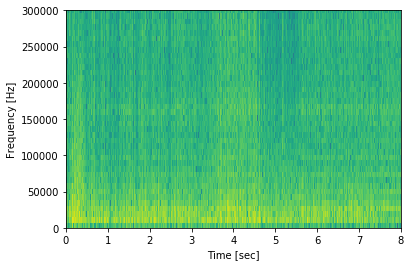

In [11]:
f,  t,Sxx = signal.spectrogram(sign, fs)   #получаем исходную спектрограмму
plt.pcolormesh(t, f, np.log(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.axis([t.min(),t.max(), 0, 3e5])

plt.savefig(filename+'spectrogram')
plt.show()


In [ ]:
b, a = signal.ellip(4, 0.1,30, 0.001)    # фильтруем сигнал
z, p, k = signal.tf2zpk(b, a)
eps = 1e-9
r = np.max(np.abs(p))
approx_impulse_len = int(np.ceil(np.log(eps) / np.log(r)))
fgust = signal.filtfilt(b, a, sign, method='gust', irlen=approx_impulse_len)

plt.plot(time,sign, label='raw signal')
plt.plot(time,fgust, 'r-', label='filtered') 
plt.plot([], [], ' ', label='RMS=%.2f' %(np.sqrt(np.mean((fgust-sign)**2))))
plt.legend()
plt.axis([time.min(),time.max(), fgust.min()*1.5, fgust.max()])
plt.savefig(filename+'filtered')
plt.show()

In [ ]:
f1, t1, Sxx1 = signal.spectrogram(fgust,fs)  # делаем спектрограмму отфильтрованного сигнала
plt.pcolormesh(t1, f1, np.log10 (Sxx1))
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [sec]')
plt.axis([t.min(),t.max(), 0, 3e5])
plt.savefig(filename+'filtered spectrogram')
plt.show()